# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [150]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [153]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [154]:
# Rename all the columns to lower case
df.columns = df.columns.str.lower()

In [155]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [156]:
# Change the index to 'linename'
df = df.set_index('linename') 

Reset the index: 

In [157]:
# Reset the index
df = df.reset_index() 

In [158]:
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [159]:
# Add a new 'num_lines' column
df['num_lines'] = df['linename'].apply(len)

In [160]:
df = df.sort_values(by='num_lines', ascending=False)

Write a function to clean column names: 

In [161]:
# Before we start cleaning, let's look at what we've got
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')

In [162]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip().replace('_', '')
    return cleaned

In [163]:
# Use the above function to clean the column names
df.columns = df.columns.map(clean)

In [164]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'numlines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [165]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='mixed')
# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()

In [166]:
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'numlines', 'day_of_week'],
      dtype='object')

In [167]:
df['day_of_week']

132292     Thursday
2686      Wednesday
2673         Monday
2674         Monday
2675        Tuesday
            ...    
112565       Monday
112564       Monday
112563       Monday
112562       Sunday
197624       Friday
Name: day_of_week, Length: 197625, dtype: object

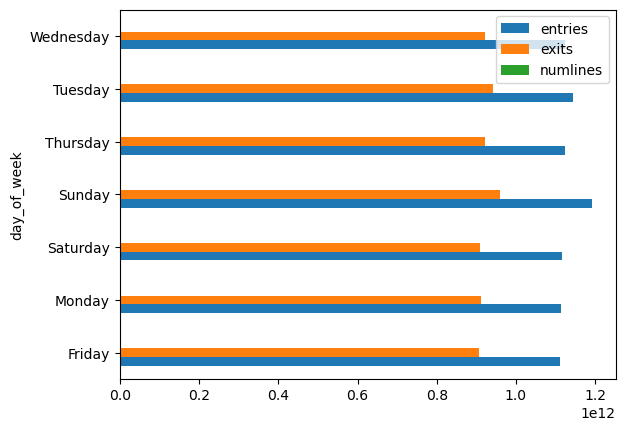

In [168]:
# Group the data by day of week and plot the sum of the numeric columns
grouped6 = df.groupby('day_of_week').sum(numeric_only = True)
grouped6.plot(kind='barh')
plt.show()

In [169]:
grouped6.columns

Index(['entries', 'exits', 'numlines'], dtype='object')

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [170]:
grouped6 = grouped6.drop(columns=['index'])

KeyError: "['index'] not found in axis"

In [171]:
# Reset the index of grouped
grouped6.reset_index(inplace=True)

# Print the first five rows of grouped
grouped6.head()

,day_of_week,entries,exits,numlines
0,Friday,1110224700078,906799065337,75573
1,Monday,1114237052454,911938153513,76110
2,Saturday,1115661545514,909142081474,74725
3,Sunday,1192306179082,959223750461,75306
4,Thursday,1122723988662,920691927110,76607
5,Tuesday,1143313287046,942230721477,77303
6,Wednesday,1123655222441,920630864687,75713


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [173]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped6['is_weekend'] = grouped5.index.map(weekend_map)

In [174]:
grouped6

,day_of_week,entries,exits,numlines,is_weekend
0,Friday,1110224700078,906799065337,75573,False
1,Monday,1114237052454,911938153513,76110,False
2,Saturday,1115661545514,909142081474,74725,False
3,Sunday,1192306179082,959223750461,75306,False
4,Thursday,1122723988662,920691927110,76607,False
5,Tuesday,1143313287046,942230721477,77303,True
6,Wednesday,1123655222441,920630864687,75713,True


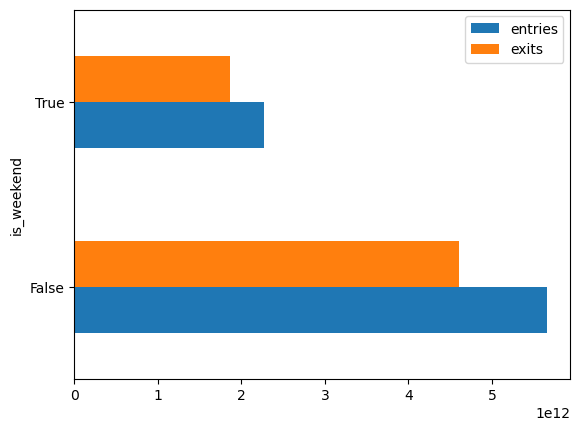

In [175]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped5.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

In [176]:
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'numlines', 'day_of_week'],
      dtype='object')

Remove the `'c/a'` and `'scp'` columns. 

In [177]:
# Remove the 'c/a' and 'scp' columns
df.drop(columns=['c/a', 'scp'], inplace=True)
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,numlines,day_of_week
132292,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,Thursday
2686,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,Wednesday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [178]:
# Your answer here 
"""
When 'grouped' data was mapped to 'weekend_map', because applies to the indices, it assigned 0 - 6 starting from 
Friday on wards and "is weekend" is 'True' for Tuesday and Wednesday. This gives a plot which assumes the 
weekend is on Tuesday and Wednesday not Saturday and Sunday which is misleading.
"""


'\nWhen \'grouped\' data was mapped to \'weekend_map\', because applies to the indices, it assigned 0 - 6 starting from \nFriday on wards and "is weekend" is \'True\' for Tuesday and Wednesday. This gives a plot which assumes the \nweekend is on Tuesday and Wednesday not Saturday and Sunday which is misleading.\n'

## Summary

You practiced your data cleanup skills using Pandas.